# Technique for Order of Preference by Similarity to Ideal Solution (TOPSIS)

## Multi-Criteria Decision Making (MCDM) Tutorial

TOPSIS was developed by Hwang and Yoon in 1981 and has become a fundamental method in decision analysis.

In this notebook, we will:
- Understand what TOPSIS is and how it differs from other MCDM methods
- Learn the theoretical foundation of TOPSIS
- Implement TOPSIS step-by-step in Python
- Apply TOPSIS to real-world decision problems
- Compare results with other MCDM techniques

## 1. How TOPSIS Differs from SAW, AHP, and ANP

Understanding the differences between MCDM techniques helps us choose the right method for our decision problem.

### Simple Additive Weighting (SAW)
- **SAW Approach**: Direct weighted sum of normalized criteria values
- **TOPSIS Approach**: Uses distance-based ranking from ideal and anti-ideal solutions
- **Key Difference**: SAW assumes linear utility, while TOPSIS considers both best and worst possible outcomes simultaneously

### Analytical Hierarchy Process (AHP)
- **AHP Approach**: Hierarchical decomposition with pairwise comparisons to derive weights
- **TOPSIS Approach**: Takes predetermined weights and focuses on alternative ranking
- **Key Difference**: AHP is primarily a weight determination method, while TOPSIS is an alternative ranking method

### Analytic Network Process (ANP)
- **ANP Approach**: Network structure allowing interdependencies and feedback between criteria
- **TOPSIS Approach**: Assumes independence between criteria and uses a linear ranking approach
- **Key Difference**: ANP handles complex relationships, while TOPSIS provides straightforward distance-based ranking

### Summary Table

| Aspect | SAW | AHP | ANP | TOPSIS |
|--------|-----|-----|-----|--------|
| **Structure** | Linear | Hierarchical | Network | Linear |
| **Weight Determination** | External | Pairwise Comparisons | Pairwise + Dependencies | External |
| **Alternative Ranking** | Weighted Sum | Composite Weights | Super Matrix | Distance to Ideals |
| **Complexity** | Low | Medium | High | Low-Medium |
| **Interdependencies** | No | Limited | Yes | No |

## 2. What is TOPSIS?

### Definition
**TOPSIS (Technique for Order of Preference by Similarity to Ideal Solution)** is a multi-criteria decision analysis method that ranks alternatives based on their geometric distance to the ideal solution. The fundamental principle is that the best alternative should be closest to the positive ideal solution (PIS) and farthest from the negative ideal solution (NIS).

![TOPSIS Concept](..\figures\TOPSIS.jpg)

### Core Concept: The Ideal Solution Approach

TOPSIS is based on the concept that the chosen alternative should have:
1. **Shortest geometric distance** from the Positive Ideal Solution (PIS)
2. **Longest geometric distance** from the Negative Ideal Solution (NIS)

#### Positive Ideal Solution (PIS or A⁺)
- Composed of the **best values** of each criterion
- For benefit criteria: maximum values
- For cost criteria: minimum values
- Represents the "perfect" alternative (usually hypothetical)

#### Negative Ideal Solution (NIS or A⁻)
- Composed of the **worst values** of each criterion  
- For benefit criteria: minimum values
- For cost criteria: maximum values
- Represents the "worst possible" alternative

### Mathematical Foundation

The TOPSIS method calculates a **closeness coefficient (CC)** for each alternative:

$$CC_i = \frac{S_i^-}{S_i^+ + S_i^-}$$

Where:
- $S_i^+$ = Distance from alternative $i$ to positive ideal solution
- $S_i^-$ = Distance from alternative $i$ to negative ideal solution
- $CC_i$ ranges from 0 to 1 (higher values indicate better alternatives)

### Key Assumptions
1. **Monotonicity**: More of a benefit criterion is better, less of a cost criterion is better
2. **Compensation**: Trade-offs between criteria are allowed
3. **Independence**: Criteria are independent (no interactions)
4. **Commensurability**: After normalization, all criteria can be compared

### When to Use TOPSIS
**Suitable for:**
- Problems with quantitative criteria
- When criteria weights are known or can be determined
- When complete ranking of alternatives is needed
- Problems requiring compensation between criteria

**Not suitable for:**
- Purely qualitative problems
- When criteria have complex interdependencies
- When no compensation is allowed between criteria
- Very small datasets (less than 3 alternatives)

## 3. TOPSIS Step-by-Step Procedure

The TOPSIS method follows a systematic 8-step process to rank alternatives:

### Step 1: Construct the Decision Matrix
Create a decision matrix where:
- Rows represent alternatives (A₁, A₂, ..., Aₘ)
- Columns represent criteria (C₁, C₂, ..., Cₙ)
- Each element xᵢⱼ represents the performance of alternative i on criterion j

$$X = \begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1n} \\
x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \cdots & x_{mn}
\end{bmatrix}$$

### Step 2: Normalize the Decision Matrix
Convert the decision matrix to a normalized form using vector normalization:

$$r_{ij} = \frac{x_{ij}}{\sqrt{\sum_{i=1}^{m} x_{ij}^2}}$$

This creates the normalized matrix R where all values are dimensionless and comparable.

### Step 3: Calculate the Weighted Normalized Matrix
Multiply each column of the normalized matrix by its corresponding weight:

$$v_{ij} = w_j \times r_{ij}$$

Where wⱼ is the weight of criterion j, and ∑wⱼ = 1.

### Step 4: Determine Positive and Negative Ideal Solutions

**Positive Ideal Solution (PIS or A⁺):**
$$A^+ = \{v_1^+, v_2^+, ..., v_n^+\}$$

Where:
- $v_j^+ = \max_i(v_{ij})$ for benefit criteria
- $v_j^+ = \min_i(v_{ij})$ for cost criteria

**Negative Ideal Solution (NIS or A⁻):**
$$A^- = \{v_1^-, v_2^-, ..., v_n^-\}$$

Where:
- $v_j^- = \min_i(v_{ij})$ for benefit criteria
- $v_j^- = \max_i(v_{ij})$ for cost criteria

### Step 5: Calculate Separation Measures

**Distance to Positive Ideal Solution:**
$$S_i^+ = \sqrt{\sum_{j=1}^{n} (v_{ij} - v_j^+)^2}$$

**Distance to Negative Ideal Solution:**
$$S_i^- = \sqrt{\sum_{j=1}^{n} (v_{ij} - v_j^-)^2}$$

### Step 6: Calculate Closeness Coefficient
$$CC_i = \frac{S_i^-}{S_i^+ + S_i^-}$$

Where 0 ≤ CCᵢ ≤ 1:
- CCᵢ = 1: Alternative is identical to PIS
- CCᵢ = 0: Alternative is identical to NIS

### Step 7: Rank Alternatives
Sort alternatives in descending order of their closeness coefficients. The alternative with the highest CCᵢ is the best choice.

### Step 8: Sensitivity Analysis
Analyze how changes in weights affect the ranking to ensure robustness of the decision.

## 4. TOPSIS Process Flowchart

![TOPSIS Flowchart](..\figures\mermaid\TOPSIS_Steps.png)

### Key Decision Points in the Flow:
1. **Criterion Type Identification**: Critical for determining ideal solutions correctly
2. **Normalization Method**: Vector normalization is standard but alternatives exist
3. **Weight Assignment**: Can be subjective or derived from other methods (AHP, entropy, etc.)
4. **Sensitivity Analysis**: Recommended for important decisions to test robustness

## 5. Practical Example: Distribution Center Location Selection in the Philippines

### Problem Statement
A logistics company needs to select the best location for a new distribution center in the Philippines. The decision involves 10 potential locations across major cities, evaluated against 4 critical criteria:

**Criteria:**
1. **Transportation Cost** (Cost - minimize): Monthly transportation cost in millions PHP
2. **Market Access** (Benefit - maximize): Population within 100km radius (millions)
3. **Infrastructure Quality** (Benefit - maximize): Composite score (1-10 scale)
4. **Labor Availability** (Benefit - maximize): Available workforce (thousands)

**Alternatives (Cities):**
1. Metro Manila (Quezon City)
2. Cebu City
3. Davao City
4. Iloilo City
5. Cagayan de Oro
6. Bacolod City
7. General Santos
8. Tacloban City
9. Baguio City
10. Zamboanga City

Let's implement TOPSIS step-by-step to find the optimal distribution center location.

In [91]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple

# Configure display options
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.precision", 4)

In [ ]:
# Define alternatives (distribution center locations)
alternatives = [
    "Metro Manila (QC)",
    "Cebu City",
    "Davao City",
    "Iloilo City",
    "Cagayan de Oro",
    "Bacolod City",
    "General Santos",
    "Tacloban City",
    "Baguio City",
    "Zamboanga City",
]

# Define criteria with clear descriptions
criteria = [
    "Transportation Cost (M PHP)",  # Cost criterion - minimize
    "Market Access (M people)",  # Benefit criterion - maximize
    "Infrastructure Quality (1-10)",  # Benefit criterion - maximize
    "Labor Availability (K people)",  # Benefit criterion - maximize
]

# Create decision matrix with realistic data for Philippine cities
# Data based on typical characteristics of these cities
# Format: [Transport Cost, Market Access, Infrastructure, Labor Availability]
decision_matrix = np.array(
    [
        [
            45.2,
            25.5,
            9.2,
            850,
        ],  # Metro Manila - high cost, excellent access/infrastructure
        [28.5, 8.2, 8.5, 420],  # Cebu City - moderate cost, good access
        [
            32.1,
            4.8,
            7.8,
            280,
        ],  # Davao City - moderate cost, decent infrastructure
        [24.3, 2.1, 7.2, 180],  # Iloilo City - lower cost, smaller market
        [26.8, 1.8, 6.8, 160],  # Cagayan de Oro - moderate cost, developing
        [22.9, 1.5, 6.5, 140],  # Bacolod City - lower cost, agricultural area
        [30.4, 1.2, 6.2, 120],  # General Santos - higher cost due to location
        [
            35.7,
            0.8,
            5.8,
            95,
        ],  # Tacloban City - higher cost, limited infrastructure
        [
            38.6,
            1.1,
            6.9,
            110,
        ],  # Baguio City - high cost due to mountain location
        [41.2, 1.4, 5.5, 125],  # Zamboanga City - high cost, security concerns
    ]
)

In [93]:
# Create DataFrame for better visualization
df_decision = pd.DataFrame(
    decision_matrix, index=alternatives, columns=criteria
)

df_decision

,Transportation Cost (M PHP),Market Access (M people),Infrastructure Quality (1-10),Labor Availability (K people)
Metro Manila (QC),45.2,25.5,9.2,850.0
Cebu City,28.5,8.2,8.5,420.0
Davao City,32.1,4.8,7.8,280.0
Iloilo City,24.3,2.1,7.2,180.0
Cagayan de Oro,26.8,1.8,6.8,160.0
Bacolod City,22.9,1.5,6.5,140.0
General Santos,30.4,1.2,6.2,120.0
Tacloban City,35.7,0.8,5.8,95.0
Baguio City,38.6,1.1,6.9,110.0
Zamboanga City,41.2,1.4,5.5,125.0


In [94]:
def topsis(
    decision_matrix: np.ndarray, weights: np.ndarray, criteria_types: List[str]
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    TOPSIS implementation for multi-criteria decision making

    Parameters:
    - decision_matrix: m x n matrix of alternatives vs criteria
    - weights: array of criterion weights (must sum to 1)
    - criteria_types: list of 'benefit' or 'cost' for each criterion

    Returns:
    - closeness_coefficients: TOPSIS scores for each alternative
    - positive_ideal: positive ideal solution
    - negative_ideal: negative ideal solution
    """

    # Step 1: Normalize the decision matrix (vector normalization)
    normalized_matrix = decision_matrix / np.sqrt(
        np.sum(decision_matrix**2, axis=0)
    )
    # print("Step 1: Normalized Decision Matrix")
    # print(
    #     pd.DataFrame(normalized_matrix, index=alternatives, columns=criteria)
    # )
    # print()

    # Step 2: Calculate weighted normalized matrix
    weighted_matrix = normalized_matrix * weights
    # print("Step 2: Weighted Normalized Matrix")
    # print(pd.DataFrame(weighted_matrix, index=alternatives, columns=criteria))
    # print()

    # Step 3: Determine positive and negative ideal solutions
    positive_ideal = np.zeros(len(criteria))
    negative_ideal = np.zeros(len(criteria))

    for j, criterion_type in enumerate(criteria_types):
        if criterion_type == "benefit":
            positive_ideal[j] = np.max(weighted_matrix[:, j])
            negative_ideal[j] = np.min(weighted_matrix[:, j])
        else:  # cost criterion
            positive_ideal[j] = np.min(weighted_matrix[:, j])
            negative_ideal[j] = np.max(weighted_matrix[:, j])

    # print("Step 3: Ideal Solutions")
    # print(f"Positive Ideal Solution (A+): {positive_ideal}")
    # print(f"Negative Ideal Solution (A-): {negative_ideal}")
    # print()

    # Step 4: Calculate separation measures
    distance_positive = np.sqrt(
        np.sum((weighted_matrix - positive_ideal) ** 2, axis=1)
    )
    distance_negative = np.sqrt(
        np.sum((weighted_matrix - negative_ideal) ** 2, axis=1)
    )

    # print("Step 4: Separation Measures")
    # print(f"Distance to PIS (S+): {distance_positive}")
    # print(f"Distance to NIS (S-): {distance_negative}")
    # print()

    # Step 5: Calculate closeness coefficients
    closeness_coefficients = distance_negative / (
        distance_positive + distance_negative
    )

    return closeness_coefficients, positive_ideal, negative_ideal

In [95]:
# Define criterion weights (must sum to 1.0)
weights = np.array(
    [0.35, 0.30, 0.20, 0.15]
)  # Transportation, Market, Infrastructure, Labor

# Define criterion types for TOPSIS calculation
criterion_types = ["cost", "benefit", "benefit", "benefit"]

print("TOPSIS Analysis for Distribution Center Location Selection")
print(f"Weights: {dict(zip(criteria, weights))}")
print(f"Criterion Types: {dict(zip(criteria, criterion_types))}")
print()

# Apply TOPSIS
cc_scores, pos_ideal, neg_ideal = topsis(
    decision_matrix, weights, criterion_types
)

TOPSIS Analysis for Distribution Center Location Selection
Weights: {'Transportation Cost (M PHP)': np.float64(0.35), 'Market Access (M people)': np.float64(0.3), 'Infrastructure Quality (1-10)': np.float64(0.2), 'Labor Availability (K people)': np.float64(0.15)}
Criterion Types: {'Transportation Cost (M PHP)': 'cost', 'Market Access (M people)': 'benefit', 'Infrastructure Quality (1-10)': 'benefit', 'Labor Availability (K people)': 'benefit'}



In [96]:
# Step 6: Rank alternatives and create results summary
print("Step 5: Closeness Coefficients and Final Ranking")

# Create results DataFrame
results_df = pd.DataFrame(
    {
        "Alternative": alternatives,
        "Closeness Coefficient": cc_scores,
        "Rank": np.argsort(-cc_scores) + 1,  # Descending order ranking
    }
)

# Sort by closeness coefficient (descending)
results_df = results_df.sort_values("Closeness Coefficient", ascending=False)
results_df.reset_index(drop=True, inplace=True)

print("Final TOPSIS Results:")
print(results_df)

Step 5: Closeness Coefficients and Final Ranking
Final TOPSIS Results:
         Alternative  Closeness Coefficient  Rank
0  Metro Manila (QC)                 0.7977     1
1          Cebu City                 0.3588     2
2         Davao City                 0.2243     3
3        Iloilo City                 0.2118     4
4       Bacolod City                 0.2108     5
5     Cagayan de Oro                 0.1868     6
6     General Santos                 0.1479     7
7      Tacloban City                 0.0970     8
8        Baguio City                 0.0803     9
9     Zamboanga City                 0.0503    10


In [ ]:
# Sensitivity Analysis


def comprehensive_sensitivity_analysis(
    decision_matrix,
    base_weights,
    criteria_types,
    alternatives,
    criteria,
    weight_variations=np.arange(0.1, 0.6, 0.05),
):
    """
    Perform comprehensive sensitivity analysis by varying each criterion's weight.

    Parameters:
    - decision_matrix: Original decision matrix
    - base_weights: Original weights for all criteria
    - criteria_types: List of 'benefit' or 'cost' for each criterion
    - alternatives: List of alternative names
    - criteria: List of criterion names
    - weight_variations: Range of weights to test for each criterion

    Returns:
    - Dictionary containing sensitivity results for each criterion
    """
    base_cc, _, _ = topsis(decision_matrix, base_weights, criteria_types)
    base_ranking = np.argsort(-base_cc) + 1
    base_winner = alternatives[np.argmax(base_cc)]

    sensitivity_results = {}

    for criterion_idx in range(len(criteria)):
        criterion_name = criteria[criterion_idx].split(" (")[0]  # Remove units
        criterion_results = []

        for new_weight in weight_variations:
            if not (0.0 <= new_weight <= 1.0):
                continue

            # Create modified weights
            test_weights = base_weights.copy()
            test_weights[criterion_idx] = new_weight

            # Redistribute remaining weight proportionally
            remaining_weight = 1.0 - new_weight
            other_indices = [
                i for i in range(len(test_weights)) if i != criterion_idx
            ]
            current_other_sum = sum(test_weights[i] for i in other_indices)

            if current_other_sum > 0:
                for i in other_indices:
                    test_weights[i] = test_weights[i] * (
                        remaining_weight / current_other_sum
                    )

            # Calculate new TOPSIS scores (suppress output)
            import sys
            from io import StringIO

            old_stdout = sys.stdout
            sys.stdout = StringIO()

            try:
                new_cc, _, _ = topsis(
                    decision_matrix, test_weights, criteria_types
                )
            finally:
                sys.stdout = old_stdout

            new_ranking = np.argsort(-new_cc) + 1
            new_winner = alternatives[np.argmax(new_cc)]

            # Calculate ranking changes
            rank_changes = np.abs(new_ranking - base_ranking).sum()

            criterion_results.append(
                {
                    "Weight": new_weight,
                    "Winner": new_winner,
                    "Winning_Score": np.max(new_cc),
                    "All_Scores": new_cc.copy(),
                    "Rank_Changes": rank_changes,
                    "Test_Weights": test_weights.copy(),
                }
            )

        sensitivity_results[criterion_name] = criterion_results

    return sensitivity_results, base_winner, base_cc


In [98]:
# Perform comprehensive sensitivity analysis
print("COMPREHENSIVE SENSITIVITY ANALYSIS")

weight_range = np.arange(0.1, 1.0, 0.01)
sensitivity_data, base_winner, base_scores = (
    comprehensive_sensitivity_analysis(
        decision_matrix,
        weights,
        criterion_types,
        alternatives,
        criteria,
        weight_range,
    )
)

print(f"Base case winner: {base_winner}")
print(
    f"Testing weight variations from {weight_range[0]:.2f} to {weight_range[-1]:.2f}"
)
print()

# Analyze stability for each criterion
for criterion_name, results in sensitivity_data.items():
    print(f"CRITERION: {criterion_name}")
    print("-" * 40)

    # Find unique winners and their weight ranges
    winners = {}
    for result in results:
        weight = result["Weight"]
        winner = result["Winner"]

        if winner not in winners:
            winners[winner] = []
        winners[winner].append(weight)

    # Display winner ranges
    for winner, weight_list in winners.items():
        min_weight = min(weight_list)
        max_weight = max(weight_list)
        print(
            f"  {winner:<15}: Wins when weight is {min_weight:.2f}-{max_weight:.2f}"
        )

    # Check stability around current weight
    current_weight = weights[
        list(criteria).index([c for c in criteria if criterion_name in c][0])
    ]
    tolerance = 0.05
    stable_results = [
        r for r in results if abs(r["Weight"] - current_weight) <= tolerance
    ]
    stable_winners = [r["Winner"] for r in stable_results]

    print(f"  Current weight: {current_weight:.2f}")
    if len(set(stable_winners)) == 1:
        print(f"  Stable around current weight: {stable_winners[0]}")
    else:
        print(f"  Winner changes near current weight: {set(stable_winners)}")
    print()

COMPREHENSIVE SENSITIVITY ANALYSIS
Base case winner: Metro Manila (QC)
Testing weight variations from 0.10 to 0.99

CRITERION: Transportation Cost
----------------------------------------
  Metro Manila (QC): Wins when weight is 0.10-0.66
  Cebu City      : Wins when weight is 0.67-0.74
  Bacolod City   : Wins when weight is 0.75-0.99
  Current weight: 0.35
  Stable around current weight: Metro Manila (QC)

CRITERION: Market Access
----------------------------------------
  Metro Manila (QC): Wins when weight is 0.10-0.99
  Current weight: 0.30
  Stable around current weight: Metro Manila (QC)

CRITERION: Infrastructure Quality
----------------------------------------
  Metro Manila (QC): Wins when weight is 0.10-0.99
  Current weight: 0.20
  Stable around current weight: Metro Manila (QC)

CRITERION: Labor Availability
----------------------------------------
  Metro Manila (QC): Wins when weight is 0.10-0.99
  Current weight: 0.15
  Stable around current weight: Metro Manila (QC)



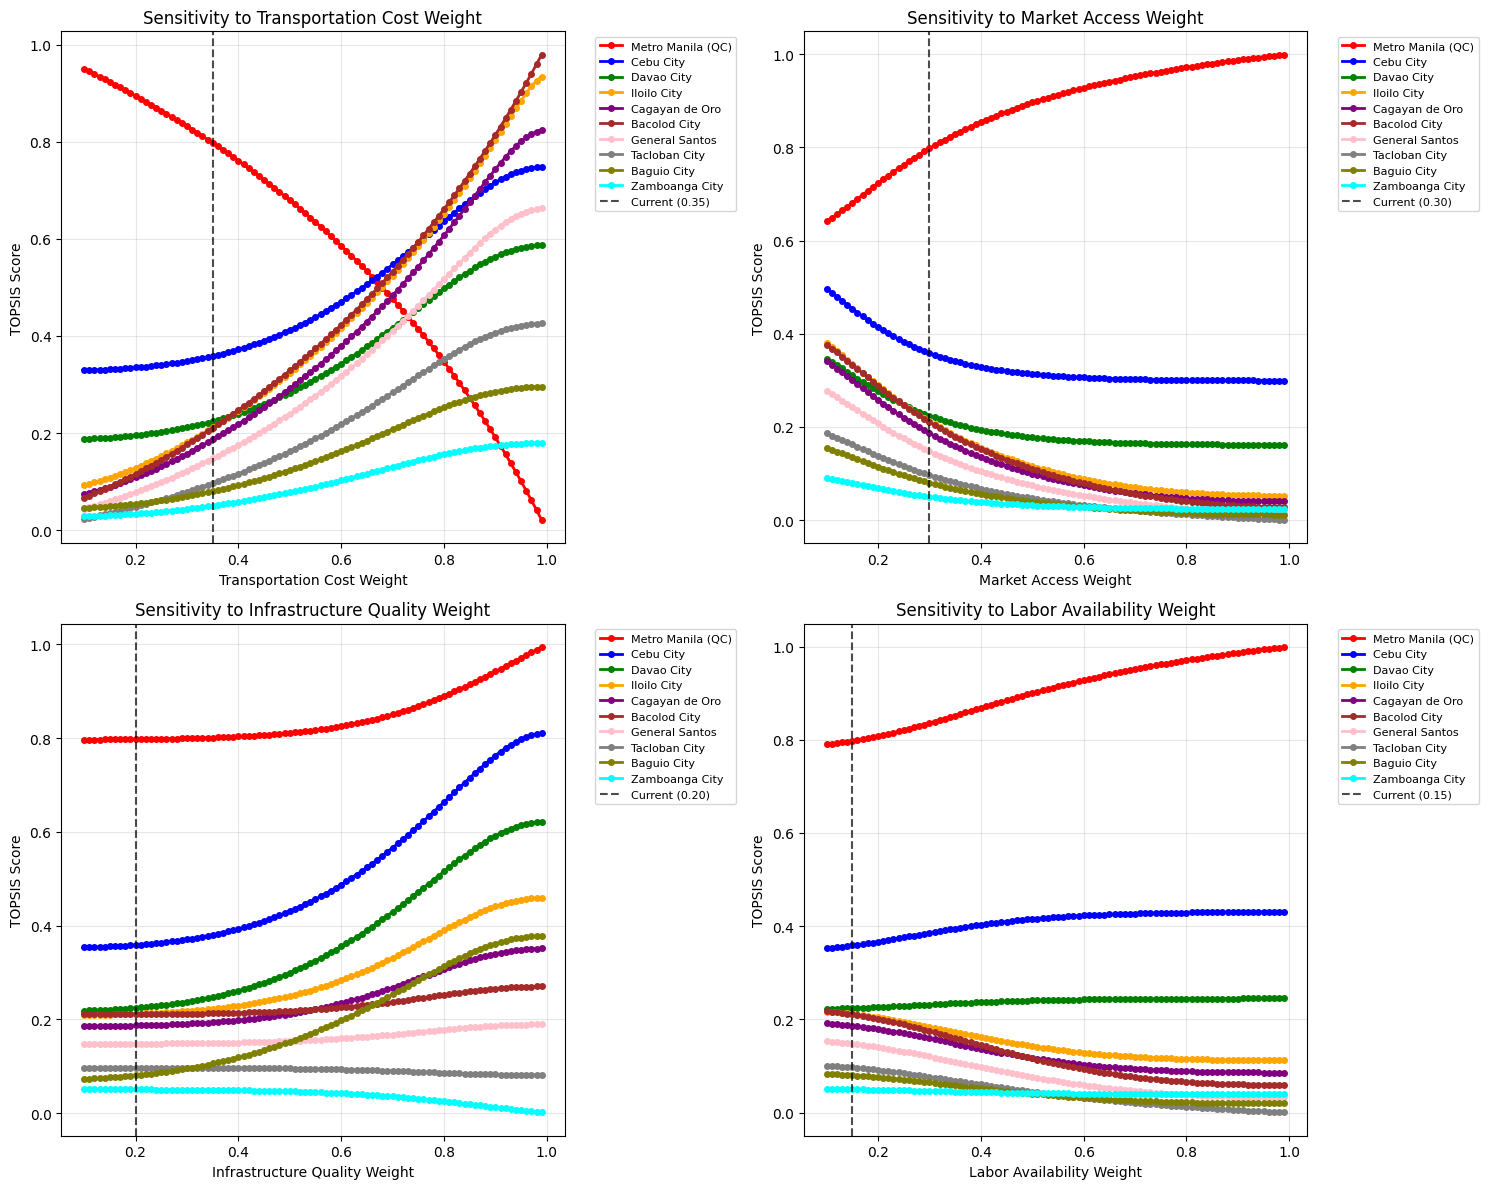

In [ ]:
# Create subplots for each criterion
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

criterion_names = list(sensitivity_data.keys())
colors = [
    "red",
    "blue",
    "green",
    "orange",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

for idx, criterion_name in enumerate(criterion_names):
    ax = axes[idx]
    results = sensitivity_data[criterion_name]

    # Plot TOPSIS scores for each alternative
    for i, alternative in enumerate(alternatives):
        scores = [result["All_Scores"][i] for result in results]
        weights_tested = [result["Weight"] for result in results]
        ax.plot(
            weights_tested,
            scores,
            marker="o",
            label=alternative,
            color=colors[i % len(colors)],
            linewidth=2,
            markersize=4,
        )

    # Mark current weight
    current_weight_idx = list(criteria).index(
        [c for c in criteria if criterion_name in c][0]
    )
    current_weight = weights[current_weight_idx]
    ax.axvline(
        x=current_weight,
        color="black",
        linestyle="--",
        label=f"Current ({current_weight:.2f})",
        alpha=0.7,
    )

    ax.set_xlabel(f"{criterion_name} Weight")
    ax.set_ylabel("TOPSIS Score")
    ax.set_title(f"Sensitivity to {criterion_name} Weight")
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)

plt.tight_layout()
plt.show()